# Tarea 3. Modelo de clasificacion

### Contexto
Este conjunto de datos contiene detalles médicos de los pacientes, incluidas características como el nivel de glucosa, la presión arterial, el nivel de insulina, el IMC, la edad y más. La variable objetivo indica si un paciente tiene diabetes. El objetivo de este conjunto de datos es crear y evaluar varios modelos de aprendizaje automático o aprendizaje profundo para predecir la aparición de la diabetes.

### Contenido

Este archivo contiene los registros médicos de los pacientes, que incluyen diversas métricas relacionadas con la salud. El objetivo es utilizar estas características para predecir si un paciente tiene diabetes. A continuación, se incluye una descripción detallada de cada columna del conjunto de datos:

**Embarazos:** Número de veces que la paciente ha estado embarazada.


**Glucosa:** Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia a la glucosa oral.


**Presión arterial:** Presión arterial diastólica (mm Hg).


**Grosor de la piel:** Grosor del pliegue cutáneo del tríceps (mm).


**Insulina:** Insulina sérica a las 2 horas (mu U/ml).


**IMC:** Índice de masa corporal (peso en kg/(altura en m)^2).


**DiabetesPedigreeFunction:** Función que puntúa la probabilidad de diabetes en función de los antecedentes familiares.


**Edad:** Edad de la paciente (años).


**Resultado:** Variable de clase (0 o 1), donde 1 representa la presencia de diabetes y 0 representa la ausencia de diabetes.

## Importar librerías y cargar la base de datos.

In [1]:
%pip install graphviz
%pip install pydotplus
%pip install six
%pip install pydot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install graphviz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import graphviz


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


# Preprocesado y modelado
import sklearn.model_selection as model_selection
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('base de datos diabetes.csv', header = 0, delimiter = ',')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Arbol de Decisión

In [6]:
# Seleccionaremos un 20% de los datos para estudiar el beneficio de las estategias de muestreo

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
     'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]
               
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    train_size=0.8,
                                                                    test_size=0.2, 
                                                                    random_state=101)

In [7]:
df_train = pd.concat([X_train,y_train],axis=1)

In [8]:
df_train.shape

(614, 9)

In [9]:
model = DecisionTreeClassifier() 

In [10]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# GENERAR LA PREDICCIÓN
y_pred = model.predict(X_test)

In [12]:
# EVALUAR CON LAS MÉTRICAS REFERENCIALES
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

Accuracy DATOS ORIGINALES: 68.83%


In [13]:
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Log Loss: 11.234385471932617


Matriz de Confusión - DATOS ORIGINALES:
 [[79 24]
 [24 27]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       103
           1       0.53      0.53      0.53        51

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



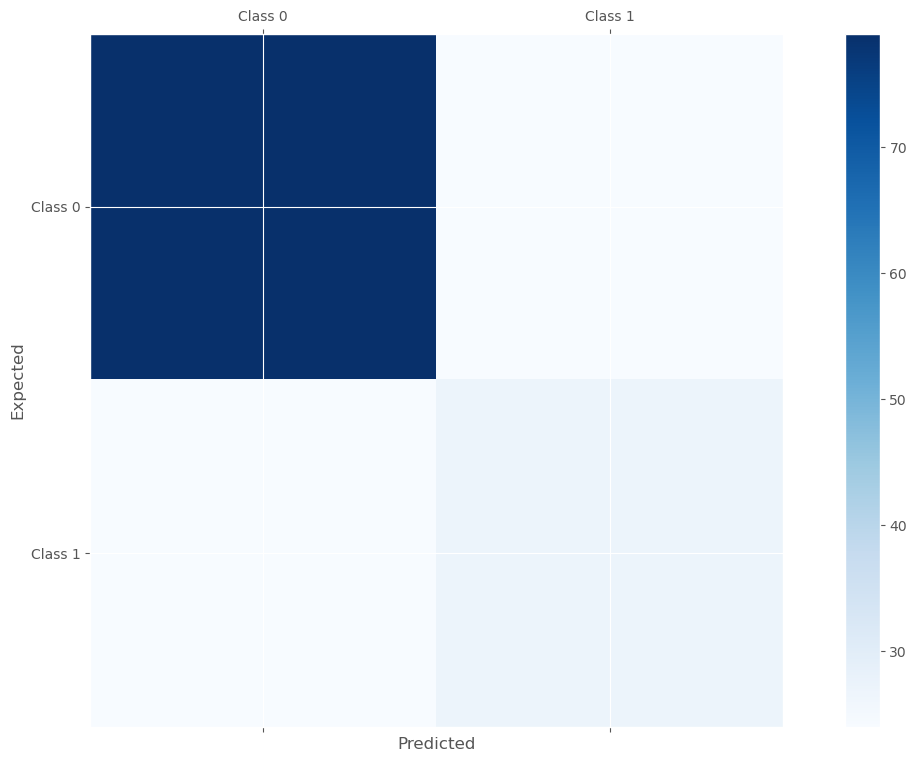

In [14]:

#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Decision Tree Classifier

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
#split dataset in features and target variable

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                'DiabetesPedigreeFunction'	, 'Age']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [17]:
# Split dataset into training set and test set:  70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1) 

In [18]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

In [19]:
# Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)

In [20]:
#Predict the response for test dataset

y_pred = clf.predict(X_test)

In [21]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


Obtuvimos una tasa de clasificación del casi 70 %, lo que se considera una buena precisión.


**Visualización del árbol de decisión**

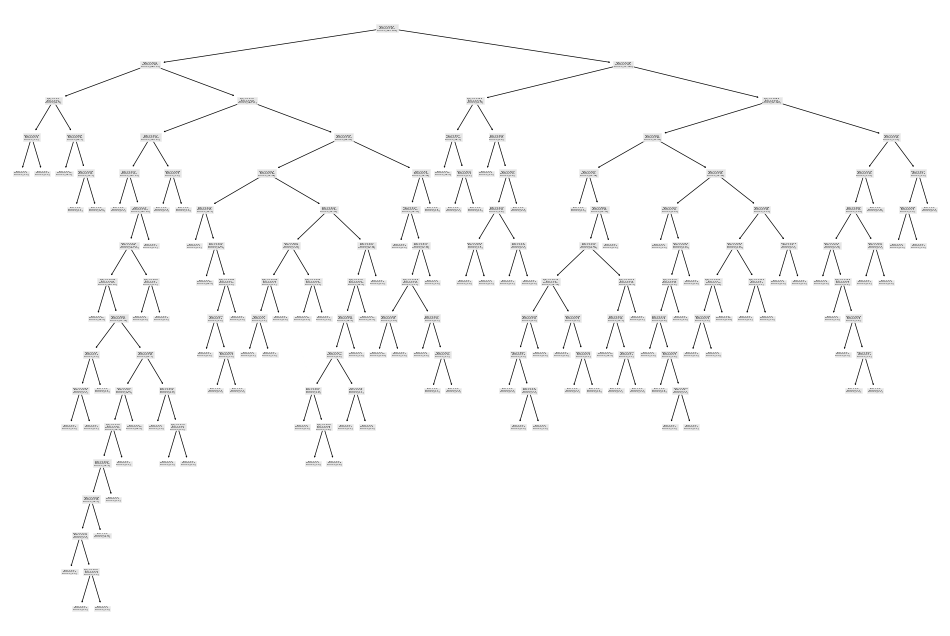

In [22]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train));

In [23]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
import sys
from sklearn.tree import export_graphviz
import pydot


In [24]:
# Visualización del árbol de decisión

#dot_data = StringIO()
#export_graphviz(clf, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
#Image(graph.create_png())


In [25]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [26]:
# Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)

In [27]:
#Predict the response for test dataset

y_pred = clf.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706
